In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

C:\Users\swink_000\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\swink_000\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
#Считаем данные для трейна и теста
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.drop(['ID'], axis = 1, inplace = True)

In [34]:
#обработаем признаки,в численных заполним пропуска нулями
#среди категориальных оставим те, у которых меньше 80 категорий
#пропуски в категориальных заполним еще одно каегорией NotGiven
#Закодируем категорильные признаки с помощью OneHotEncoder
def dataframe_preprocess(df, sample):
    df_float = df.select_dtypes(include=[np.float])
    df_object = df.select_dtypes(include=['object'])
    used_cat_cols = []
    #Выберем те признаки, в которых категорий не большое количество
    for col in df_object.columns:
        if len(df_object[col].unique()) <= 80:
            used_cat_cols.append(col) 

    if sample == 'train':
        df = df[list(df_float.columns) + used_cat_cols + ['label']]
    else:
        df = df[list(df_float.columns) + used_cat_cols]
    #Заменим NaN значения нулями для численных, а категориальные NaN заменим еще одной категорией, которая будет обозначать, 
    #что данных нет
    df[list(df_float.columns)] = df[list(df_float.columns)].fillna(0)
    df[used_cat_cols] = df[used_cat_cols].fillna('Not given')
    df = pd.get_dummies(df, columns = list(used_cat_cols))
    
    try:
        label = df.pop('label')
        df['label']=label 
    except KeyError:
        pass
    
    return df

transformedTrain = dataframe_preprocess(train, 'train')
transformedTest = dataframe_preprocess(test, 'test')

In [35]:
#обучаться будем на тех признаках, которые есть и в train и в test
trainFeatures = list(set(transformedTrain) & set(transformedTest))
transformedTrain = transformedTrain[trainFeatures + ['label']]
transformedTest = transformedTest[trainFeatures]

In [37]:
#Обучение проиходит с базовыми параметрами градиентного бустинга с увеличенным количеством деревьев
gradBoost = GradientBoostingClassifier(n_estimators = 150, verbose =1,
                                       random_state =42).fit(transformedTrain.iloc[:, :-1],
                                                             transformedTrain['label'])                        

      Iter       Train Loss   Remaining Time 
         1           0.5194            3.19m
         2           0.5141            3.25m
         3           0.5102            3.15m
         4           0.5066            3.34m
         5           0.5034            3.28m
         6           0.5007            3.20m
         7           0.4982            3.16m
         8           0.4963            3.03m
         9           0.4940            3.05m
        10           0.4923            2.97m
        20           0.4791            2.72m
        30           0.4710            2.51m
        40           0.4654            2.29m
        50           0.4608            1.97m
        60           0.4575            1.72m
        70           0.4537            1.50m
        80           0.4508            1.28m
        90           0.4484            1.06m
       100           0.4449           52.60s


In [38]:
#Формируем файл для сдачи на Kaggle
submissionDf = pd.DataFrame()
submissionDf['ID'] = range(len(transformedTest))
submissionDf['result'] = gradBoost.predict_proba(transformedTest)[:,1]
submissionDf.to_csv('submission.csv',index = False, sep = ',')

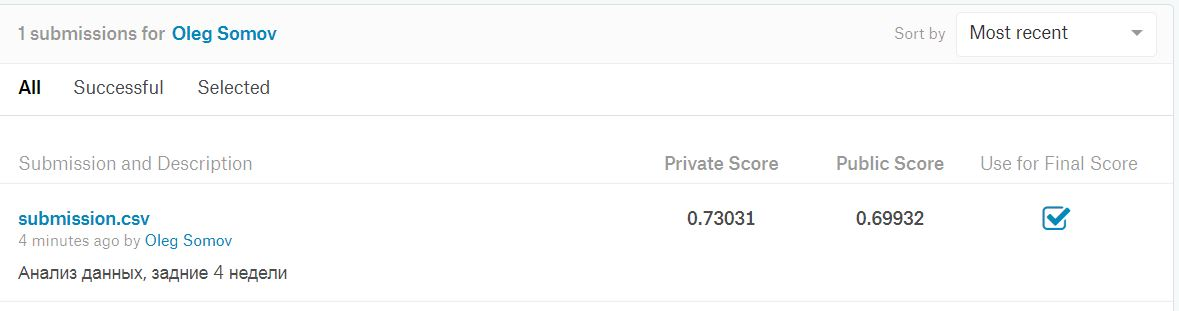

In [43]:
#Картинка
from IPython.display import Image
Image(filename = 'kaggle.jpg', width = 1000, height = 500)